<a href="https://colab.research.google.com/github/Jospina1001/artificial-intelligence/blob/main/Corte1_Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Juan Sebastián Ospina - Julián Cortez

# Preguntas Teóricas

PREGUNTAS TEÓRICAS

1.	A. Según la definición expuesta en la página 40 del libro, se puede llegar a definir a la aspiradora como un agente racional, puesto que el único objetivo que este tiene es el de limpiar, es decir, en ningún punto se menciona que se deben tener en cuenta aspectos como la energía o el trayecto que use para limpiar. Teniendo en cuenta esto, la aspiradora cumple su función de limpiar cada sección, por lo cual obtendrá una puntuación máxima en cada caso.

  B. Para este segundo caso, además de sumar puntos por cada basura recogida, se resta por cada movimiento que se realice. Es aquí donde el agente tendrá que pasar a un estado interno para maximizar su puntaje, manteniendo en juego la energía que se consume, en vez del caso anterior, donde simplemente actuaba por reacción únicamente en busca de limpiar. La aspiradora ahora conocerá las consecuencias de sus dos posibles acciones (limpiar o moverse), con lo cual logrará conocer sus efectos en el entorno para de esta forma llegar a mejores decisiones.
2.	Ejemplos de agentes que tienen como métrica prioritaria sus primeras unidades de tiempo: 

  Un agente que encuentre las publicidades más acordes a cada usuario en el momento en que este abre un video de YouTube. Para este caso el agente ya debe conocer algunas de las características del usuario según los datos que ha recogido con anterioridad y debe elegir una opción tal que: se ajuste a dichas características, no se vuelva repetitiva la publicidad que el usuario ve y que se realice en un tiempo óptimo para evitar tiempos de espera.  Si este tiempo se sobrepasa, la IA deberá elegir un video publicitario aleatorio.

  El segundo ejemplo puede ser DALL-E 2: Una inteligencia artificial abierta para ser usada por cualquier persona, capaz de convertir cualquier texto a una imagen. Una vez el usuario escribe el texto, se abre una barra con un tiempo de espera, una vez este tiempo acaba DALL-E 2 muestra 5 imágenes creadas por la IA que hacen alusión al texto. En este ejemplo, DALL-E 2 tiene un tiempo límite, una vez este acabe muestra los 5 mejores caminos encontrados para las imágenes. Esto no implica que sean las 5 mejores soluciones existentes, ya que esta IA tiene como métrica principal el tiempo.

3.	PEAS

  **Jugar Baloncesto:**

  •	Performance: Cantidad de puntos anotados por cada equipo o jugador
  
  •	Environment: Cancha de baloncesto

  •	Actuators: Cuerpo humano, especialmente las extremidades

  •	Sensors: Tacto, visión, oído

  **Explorar la superficie lunar**

  •	Performance: Distancia recorrida, cantidad de muestras recogidas

  •	Environment: Superficie Lunar

  •	Actuators: Cuerpo humano, especialmente las extremidades

  •	Sensors: Tacto, visión

  **Comprar una obra de Arte en una subasta**

  •	Performance: Dinero ofrecido, valor de cada pintura adquirida

  •	Environment: Lugar donde se realice la subasta

  •	Actuators: La mano que se levanta para subir el dinero ofrecido

  •	Sensors: Visión, oído

  **Jugar Poker:**

  •	Performance: Rondas ganadas, Dinero que se esté apostando en la ronda actual, dinero perdido y/o ganado

  •	Environment: Mesa de Poker

  •	Actuators: Manos

  •	Sensors: Visión, oído

  **ChatBot para una mesa de ayuda**

  •	Performance: Calificación que los usuarios den al servicio y si se resolvieron las dudas.

  •	Environment: Chat

  •	Actuators: Respuestas del ChatBot

  •	Sensors: Análisis de las preguntas hechas por el usuario


# __Robot Aspiradora__

In [ ]:
from IPython.display import display
import ipywidgets as widgets
import time
import random

global flag
global flag1
global objetos


class Tablero:
  def __init__(self, X, Y):

    tamano_celda=(50, 50)
    n_celdas=(X,Y)

    self.out = widgets.HTML()
    display(self.out)
    self.tamano_celda = tamano_celda
    self.n_celdas = n_celdas

  def dibujar(self, objetos):
    tablero = "<table border='1' >{}</table>"
    filas = ""

    for i in range(self.n_celdas[0]):
      s = ""
      for j in range(self.n_celdas[1]):
        contenido =""
        for o in objetos:
          if o.x == j and o.y == i:
            contenido = \
            "<div style='transform: rotate({angulo}deg);font-size:{tamano_emoticon}px;'>{emoticon}</div>".\
            format(angulo = o.angulo, tamano_emoticon = o.tamano_emoticon, emoticon = o.emoticon)     
        s += "<td style='height:{alto}px;width:{ancho}px'>{contenido}</td>".\
          format(alto = self.tamano_celda[0], ancho = self.tamano_celda[1], 
                contenido = contenido)
      filas += "<tr>{}</tr>".format(s)
    tablero = tablero.format(filas)
    self.out.value = tablero

In [ ]:
class Agente:
  def __init__(self,X,Y, x=0, y=0, angulo=0, emoticon="🤖", tamano_emoticon=30):
    
    self.x = x
    self.y = y
    self.X = X
    self.Y = Y
    self.angulo = angulo
    self.emoticon = emoticon
    self.tamano_emoticon = tamano_emoticon

    self.estado1=0
    self.estado2=0
    self.estado3=0

    self.flag=1
    self.flag1=0
    
#----------------------------------------------------------------------------------#
  def abajo(self,posicion,objetos,limpio):

    if self.estado1==1 and self.estado2==1 and self.estado3==1:
      return 2

    x1=posicion[0]
    y1=posicion[1]

    x2=posicion[2]
    y2=posicion[3]

    x3=posicion[4]
    y3=posicion[5]

    if self.y < self.Y-1 :
      self.angulo=180

      if self.y+1 == y1 and self.x == x1 and self.estado1==0:
        time.sleep(1)
        #COMER
        self.y +=1
        objetos[1]=limpio
        escenario.dibujar(objetos)
        self.estado1=1
        return 1
      elif self.y+1 == y2 and self.x == x2 and self.estado2==0:
        time.sleep(1)
        #COMER
        self.y +=1
        objetos[2]=limpio
        escenario.dibujar(objetos)
        self.estado2=1
        return 1
      elif self.y+1 == y3 and self.x == x3 and self.estado3==0:
        time.sleep(1)
        #COMER
        self.y +=1
        objetos[3]=limpio
        escenario.dibujar(objetos)
        self.estado3=1
        return 1
      else:
        self.y += 1
        return 1

    else:
      if self.x >= self.X-1 :
        return 2
      self.x += 1
      self.flag1 +=1
      if self.flag1==1:
        self.angulo=90
        return 1
      elif self.flag1==3:
        self.falg1=0
        return 0
      else:
        return 1

  def arriba(self,posicion,objetos,limpio):

    if self.estado1==1 and self.estado2==1 and self.estado3==1:
      return 2 #Memoria

    x1=posicion[0]
    y1=posicion[1]

    x2=posicion[2]
    y2=posicion[3]

    x3=posicion[4]
    y3=posicion[5]
    
    if self.y > 0 :
      self.angulo=0

      if self.y-1 == y1 and self.x == x1 and self.estado1==0 :
        time.sleep(1)
        #COMER
        self.y -=1
        objetos[1]=limpio
        escenario.dibujar(objetos)
        self.estado1=1
        return 0
      elif self.y-1 == y2 and self.x == x2 and self.estado2==0:
        time.sleep(1)
        #COMER
        self.y -=1
        objetos[2]=limpio
        escenario.dibujar(objetos)
        self.estado2=1
        return 0
      elif self.y-1 == y3 and self.x == x3 and self.estado3==0:
        time.sleep(1)
        #COMER
        self.y -=1
        objetos[3]=limpio
        escenario.dibujar(objetos)
        self.estado3=0
        return 0
      else:
        self.y = self.y -1
        self.flag1=0
        return 0

    else:
      if self.x >= self.X-1:
        return 2
      self.x += 1
      self.flag1 += 1
      if self.flag1==1:
        self.angulo=90
        return 0
      elif self.flag1==3:
        self.falg1=0
        return 1
      else:
        return 0

  def derecha(self):
    if self.x < self.X : self.x += 1
    self.angulo = 90
#----------------------------------------------------------------------------------#

  def girar(self,grados):
    self.angulo = grados
#----------------------------------------------------------------------------------#
  def radar(self,posicion,objetos,limpio):
    x1=posicion[0]
    y1=posicion[1]

    x2=posicion[2]
    y2=posicion[3]

    x3=posicion[4]
    y3=posicion[5]


    if self.y == y1 and self.x == x1-1 and self.estado1==0:
      #me giro 
      self.angulo=90
      time.sleep(1)
      escenario.dibujar(objetos)
      #me muevo 
      time.sleep(1)
      self.x += 1
      #Como
      objetos[1]=limpio

      escenario.dibujar(objetos)
      time.sleep(1)

      #devolverme a estado inicial
      self.angulo=270
      escenario.dibujar(objetos)
      self.x -=1
      time.sleep(1)
      escenario.dibujar(objetos)

      self.estado1=1

      return 1
      

    elif self.y == y1 and self.x == x1+1 and self.estado1==0:
      #me giro 
      self.angulo=270
      time.sleep(1)
      escenario.dibujar(objetos)
      #me muevo 
      time.sleep(1)
      self.x -= 1
      #Como
      objetos[1]=limpio
      
      escenario.dibujar(objetos)
      time.sleep(1)

      #devolverme a estado inicial
      self.angulo=90
      escenario.dibujar(objetos)
      self.x +=1
      time.sleep(1)
      escenario.dibujar(objetos)

      self.estado1=1

      return 1
      
#----------------------------------------------------------------------------------#
    elif self.y == y2 and self.x == x2-1 and self.estado2==0 :
      #me giro 
      self.angulo=90
      time.sleep(1)
      escenario.dibujar(objetos)
      #me muevo 
      time.sleep(1)
      self.x += 1
      #Como
      objetos[2]=limpio

      escenario.dibujar(objetos)
      time.sleep(1)

      #devolverme a estado inicial
      self.angulo=270
      escenario.dibujar(objetos)
      self.x -=1
      time.sleep(1)
      escenario.dibujar(objetos)

      self.estado2=1

      return 1
      

    elif self.y == y2 and self.x == x2+1 and self.estado2==0:
      #me giro 
      self.angulo=270
      time.sleep(1)
      escenario.dibujar(objetos)
      #me muevo 
      time.sleep(1)
      self.x -= 1
      #Como
      objetos[2]=limpio

      escenario.dibujar(objetos)
      time.sleep(1)

      #devolverme a estado inicial
      self.angulo=90
      escenario.dibujar(objetos)
      self.x +=1
      time.sleep(1)
      escenario.dibujar(objetos)

      self.estado2=1

      return 1
#----------------------------------------------------------------------------------#
    elif self.y == y3 and self.x == x3-1 and self.estado3==0:
      #me giro 
      self.angulo=90
      time.sleep(1)
      escenario.dibujar(objetos)
      #me muevo 
      time.sleep(1)
      self.x += 1
      #Como
      objetos[3]=limpio

      escenario.dibujar(objetos)
      time.sleep(1)

      #devolverme a estado inicial
      self.angulo=270
      escenario.dibujar(objetos)
      self.x -=1
      time.sleep(1)
      escenario.dibujar(objetos)

      self.estado3=1

      return 1
      

    elif self.y == y3 and self.x == x3+1 and self.estado3==0:
      #me giro 
      self.angulo=270
      time.sleep(1)
      escenario.dibujar(objetos)
      #me muevo 
      time.sleep(1)
      self.x -= 1
      #Como
      objetos[3]=limpio

      escenario.dibujar(objetos)
      time.sleep(1)

      #devolverme a estado inicial
      self.angulo=90
      escenario.dibujar(objetos)
      self.x +=1
      time.sleep(1)
      escenario.dibujar(objetos)

      self.estado3=1

      return 1
    else:
      return 0
      

In [ ]:
energia=int(input("Digite energia: "))

x=input("Digite numero celdas X: ")
X=int(x)
y=input("Digite numero celdas Y: ")
Y=int(y)
tam=(50, 50)

x1= random.randint(0, X-1)
x2= random.randint(0, X-1)
x3= random.randint(0, X-1)

y1= random.randint(0, Y-1)
y2= random.randint(0, Y-1)
y3= random.randint(0, Y-1)

while (x1 == 0 and y1 == 0) or (x1 == 1 and y1 == 0):
  x1= random.randint(0, X-1)
  y1= random.randint(0, Y-1)

while (x2 == 0 and y2 == 0) or (x2 == 1 and y2 == 0) :
  x2= random.randint(0, X-1)
  y2= random.randint(0, Y-1)

while (x3 == 0 and y3 == 0) or (x3 == 1 and y3 == 0):
  x3= random.randint(0, X-1)
  y3= random.randint(0, Y-1)


if x1==x2 and y1==y2:
  x1= random.randint(0, X-1)
  y1= random.randint(0, Y-1)

if x1==x3 and y1==y3:
  x1= random.randint(0, X-1)
  y1= random.randint(0, Y-1)

if x2==x3 and y2==y3:
  x2= random.randint(0, X-1)
  y3= random.randint(0, Y-1)

escenario = Tablero(Y,X)
agente = Agente(Y,X,angulo=90)

pos=[x1,y1,x2,y2,x3,y3]

basura1 = Agente(Y,X,pos[0], pos[1], 0, emoticon="🍂", tamano_emoticon=30)
basura2 = Agente(Y,X,pos[2], pos[3], 0, emoticon="🍂", tamano_emoticon=30)
basura3 = Agente(Y,X,pos[4], pos[5], 0, emoticon="🍂", tamano_emoticon=30)
limpio = Agente(Y,X,0, 0, 0, emoticon="🍂", tamano_emoticon=0)

objetos = [agente, basura1, basura2, basura3]

#Primer movimiento
flag=1
energia=energia-1
energy=energia
escenario.dibujar(objetos)
time.sleep(1)
agente.derecha()
agente.girar(180)


while(energy>0):
  
  print("energia restante:",energy)
  if flag==1:
    escenario.dibujar(objetos)
    time.sleep(1)
    valor=agente.radar(pos,objetos,limpio)
    if valor != 1:
      flag=agente.abajo(pos,objetos,limpio)
    
    
  elif flag==2:
    energy+=1
    print("Fin de recorrido")
    print("Energia Restante= ",energy)
    break;
  else:
    escenario.dibujar(objetos)
    time.sleep(1)
    valor=agente.radar(pos,objetos,limpio)
    if valor != 1:
      flag=agente.arriba(pos,objetos,limpio)
    

  energy=energy-valor-1
  valor=0
  

print("se acabo la energia")
  



Digite energia: 20
Digite numero celdas X: 6
Digite numero celdas Y: 6


HTML(value='')

energia restante: 19
energia restante: 18
energia restante: 17
energia restante: 16
energia restante: 15
energia restante: 14
energia restante: 13
energia restante: 12
energia restante: 11
energia restante: 9
energia restante: 8
energia restante: 7
energia restante: 6
energia restante: 4
energia restante: 3
energia restante: 2
se acabo la energia


# Punto 5: Pruebas




**Punto** #5
Pruebas:
se hacen con un mapa de 5x5 y una energia inicial de 15

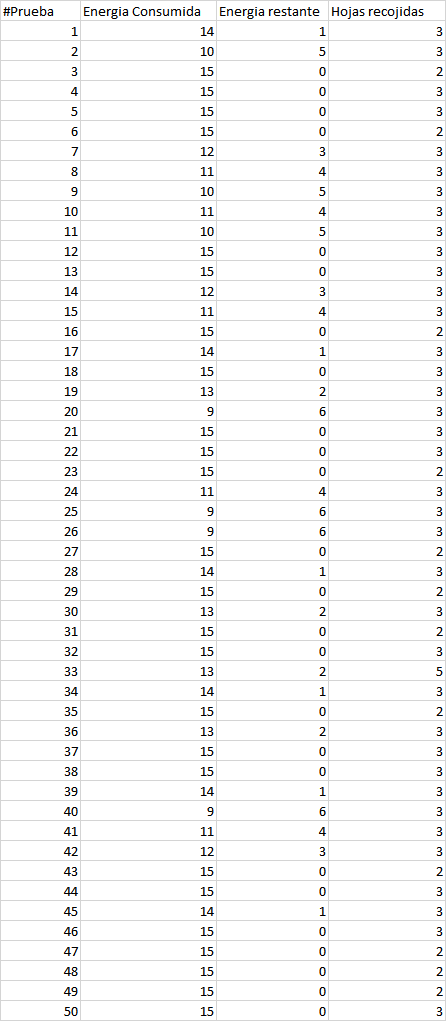

Promedios:
energia Consumida: 13.36 /
hojas recogidas: 2.8

